In [3]:
%matplotlib inline

import pandas as pd
import scipy.optimize as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

data = pd.read_csv("/home/jack/Code/UCSB129L/Roten-8831794-hw7/straightTracks.txt", sep=" ") 
data.columns = ['X0','Y0','y00','y01','y02','y03','y10','y11','y12','y13','0']

Text(0.5, 1.0, 'y00, y01, y02, y03')

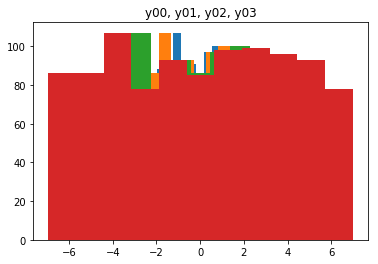

In [4]:
y00 = plt.hist(data['y00'], bins ='auto')
plt.hist(data['y01'], bins ='auto')
plt.hist(data['y02'], bins ='auto')
plt.hist(data['y03'], bins ='auto')
plt.title('y00, y01, y02, y03')
# the distances of the the plates are 2,3,5,7
# This is looking promising, I now have a good 
# distrubution of data graphed on the histogram.
# The odd thing is that I 

# maybe I should take the point from the last set of data?

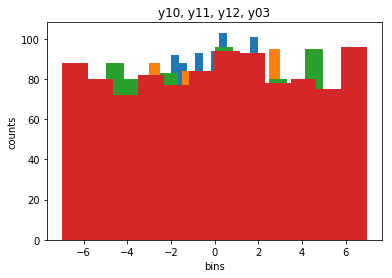

In [5]:
y10 = plt.hist(data['y10'], bins = 11)
y11 = plt.hist(data['y11'], bins =12)
y12 = plt.hist(data['y12'], bins =12)
y13 = plt.hist(data['y13'], bins =12)
plt.title('y10, y11, y12, y03')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
# This number of bins is determined from using the 
# bins = 'auto' parameter, then playing around with
# the number of bins to get observable peaks.
# Now take the middle value of each bin with the greatest
# number of counts

### Elementary Calculation of y value for track 2
This should be able to iterate over all the data sets and return y points, which in combination with known x points,
we can form a set of coordinates. With this set of coordinates we can plot them on a graph, then fit a linear line to them, this will represent our tracks 1, and 2. From these tracks we can then find the x axis intercept(where y = 0), which will give us X1 for track 1 and X2 for track 2. Jebus this is a process!

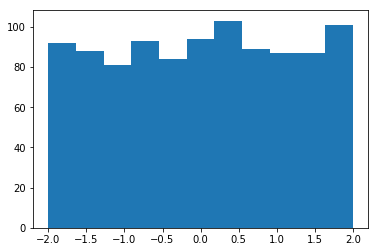

0.17900529864571557 

0.5417325713729892 

0.3603689350093524


In [6]:
x0=2
x1=3
x2=5
x3=7
y10=plt.hist(data['y10'], bins = 11)
plt.show(True)
#for i in range(len(y10[0])):
    #print('bin count: ', y10[0][i], 'at', y10[1][i]) # this seems to give left side of the bin... 
    #print(y10[1][i+1], '\n') # alls I need to do is take the average of these two left bin positions that will be my x value!

y10maxind=y10[0].tolist().index(max(y10[0]))


print(y10[1][y10maxind], '\n')
print(y10[1][y10maxind + 1], '\n')
y10ave=(y10[1][y10maxind] + y10[1][y10maxind + 1])/2 
print(y10ave)

#print('maximum at: ' )
# now wish to extract a value out of the histograms

# okay that is my y value!
# take this and scale it as a function to 1 produce 
# a graph, 2 give largest counted value, 3 give point in y where this value is with respect to the y=0 axis.

In [7]:
class Datainfo:
    def __init__(self, csv_filename):
        '''
        Reads in data file and provides pandas dataframe for later methods to build off of.
        
        '''
        
        self.csv_data = pd.read_csv(csv_filename, sep=' ')
        self.csv_data.columns = ['X0','Y0','y00','y01','y02','y03','y10','y11','y12','y13','0']
        
    def histogram(self, column):
        '''
        Provides a histogram of given column or multiple columns
        
        '''

        plt.hist(data[column], bins = 'auto')
        plt.title(column)
        plt.xlabel('bins')
        plt.ylabel('counts')
        plt.show()
    
    def ypoint(self, column):
        '''
        value for where histogram bin has max counts, the middle of this bin is taken to be the most common 
        particle hit and is considered the particle's trajectory point. This gets a little harry...
        
        '''
        # puts our data into a histogram, visual add to finding max bin number
        column=plt.hist(data[column], bins = 'auto') # pass column name into histogram method (from matplotlib)
        
        # turns np array into py list (allows to find max)
        columnMaxInd=column[0].tolist().index(max(column[0])) 
        
        #bin index gives left point of bin, so I am averaging the over left point of max bin and it's right point
        # for n bins there are n+1 bin points!
        columnAve=(column[1][columnMaxInd] + column[1][columnMaxInd + 1])/2 
        
        return columnAve
    
    
    
        

-1.077812883172459

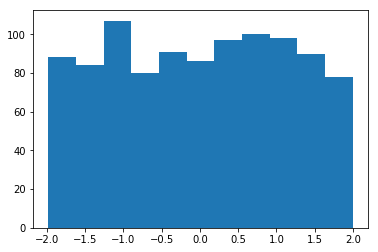

In [8]:
DI = Datainfo("/home/jack/Code/UCSB129L/Roten-8831794-hw7/straightTracks.txt")
DI.ypoint('y00')